### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train.shape, X_test.shape

((455, 13), (51, 13))

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [256]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Массив коэффициентов={}".format(reg.coef_))

Массив коэффициентов=[-1.07843104e-01  5.38195623e-02  2.58855487e-02  2.47032684e+00
 -1.80981131e+01  4.09814451e+00 -7.58931223e-03 -1.51163958e+00
  2.95769657e-01 -1.25347967e-02 -9.16513025e-01  9.09646207e-03
 -4.66332150e-01]


In [257]:
y_pred = reg.predict(X_test)
y_pred.size, y_test.size
print(y_pred[:10], y_test[:10])

[35.1923373  27.20346752 25.5153569  22.53978975 13.78608226 30.7619544
 28.59009534 14.06426079 10.29482736 32.53931169] [34.6 27.1 23.2 50.  13.4 23.5 28.   7.5  7.2 29.8]


### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [258]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

In [259]:
sklearn_mse = mean_squared_error(y_test, y_pred)

my_mse = MSE(y_test, y_pred)
print('Результат на тестовой выборке:')
print('MSE из sklearn:', sklearn_mse)
print('MSE собственный:', my_mse)

Результат на тестовой выборке:
MSE из sklearn: 31.335282758778895
MSE собственный: 31.335282758778895


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [260]:
y_pred_2 = [np.mean(y_test)] * y_test.size
print(mean_squared_error(y_test, y_pred_2))

99.47829296424452


Как и ожидалось, наивный алгоритм предсказывает цену намного хуже чем наша модель, ошибка в данном случае в 3 раза больше чем у модели. ( => мы предсказали цену относительно хорошо)

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [261]:
from sklearn.linear_model import Ridge

reg = Ridge().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE после применения регуляризации (коэффициент по умолчанию равен 1): ', mean_squared_error(y_test, y_pred))

MSE после применения регуляризации (коэффициент по умолчанию равен 1):  31.311472866569062


In [262]:
import matplotlib.pyplot as plt

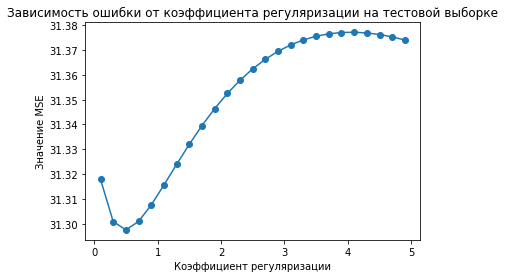

In [263]:

lambdas = np.arange(0.1, 5.0, 0.2)
errors = []
for val in lambdas:
    reg = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))
plt.plot(lambdas, errors)
plt.scatter(lambdas, errors)
plt.xlabel('Коэффициент регуляризации')
plt.ylabel('Значение MSE')
plt.title('Зависимость ошибки от коэффициента регуляризации на тестовой выборке')
plt.show()


Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Из графика видно, что L2 регуляризация практически бесполезна в данном случае (с увеличением коэффициента регуляризации увеличивается и ошибка.)
Однако можно заметить, что результат на тестовой выборке улучшится при применении регуляризации с коэффициентом 0.5 .